In [16]:
import pandas as pd
import json
import os
from semantic_analysis.conceptnet import get_readable_concepts

## Analyzing places in conceptnet

In [17]:
coco_places = get_readable_concepts(pd.read_csv("../ConceptNet/conceptnet_coco_places.csv", sep='\t', header=None))
meaningful_rel = {'RelatedTo', 'AtLocation','IsA','HasA','PartOf','UsedFor','MadeOf','LocatedNear'}
coco_places = coco_places.loc[lambda x: x[1].isin(meaningful_rel)]

In [44]:
def describe_place(coco_places, place):
    rows = coco_places.loc[lambda x: (x[2]==place) | (x[3]==place)]
    g = MultiDiGraph()
    for row in rows.iterrows():
        g.add_edge(row[1][2],row[1][3], rel=row[1][1])
    return g

def located_at(coco_places, place):
    rows = coco_places.loc[lambda x: (x[1].isin(['AtLocation','PartOf','LocatedNear'])) & (x[3]==place)]
    rows2 = coco_places.loc[lambda x: (x[1].isin(['HasA','LocatedNear','AtLocation'])) & (x[2]==place)]
    rows = pd.concat([rows, rows2])
    g = MultiDiGraph()
    for row in rows.iterrows():
        g.add_edge(row[1][2],row[1][3], rel=row[1][1])
    return g


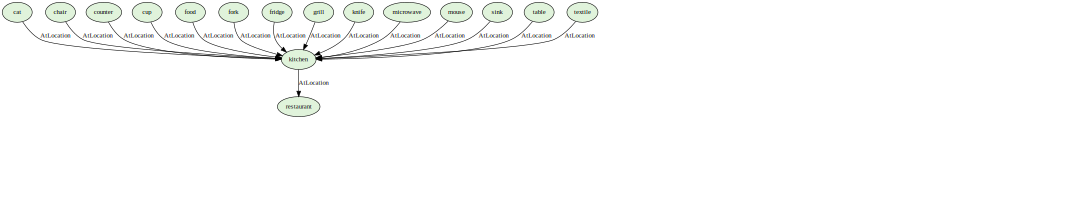

In [43]:
g = located_at(coco_places, 'kitchen')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

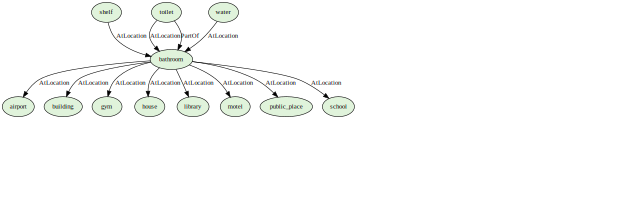

In [42]:
g = located_at(coco_places, 'bathroom')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

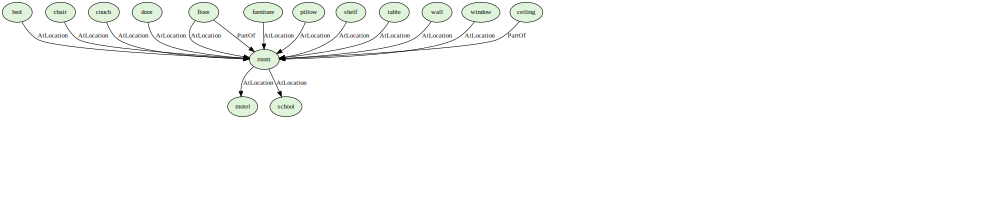

In [61]:
g = located_at(coco_places, 'room')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

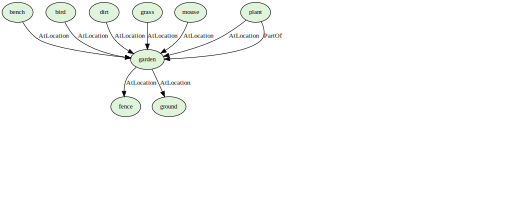

In [41]:
g = located_at(coco_places, 'garden')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

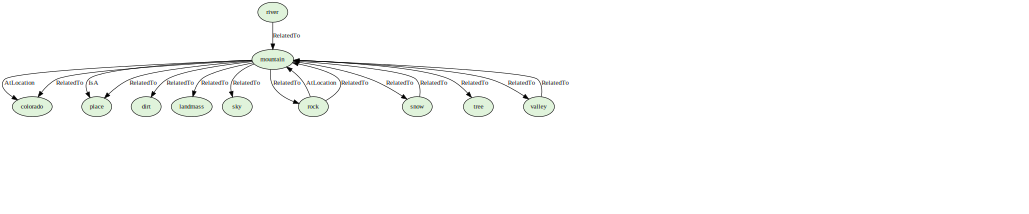

In [50]:
g = describe_place(coco_places, 'mountain')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

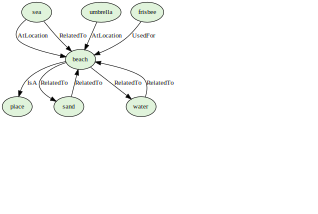

In [53]:
g = describe_place(coco_places, 'beach')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

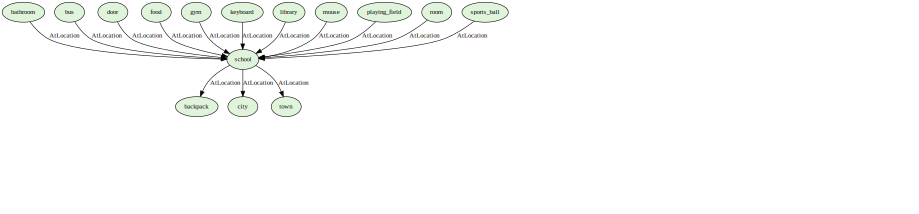

In [60]:
g = located_at(coco_places, 'school')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

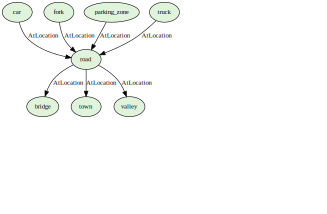

In [65]:
g = located_at(coco_places, 'road')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

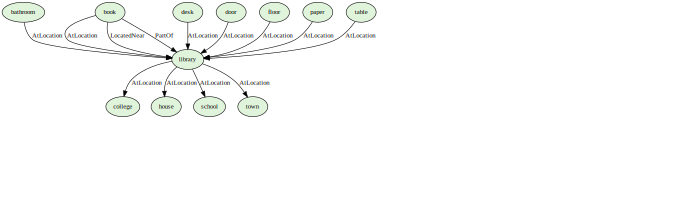

In [77]:
g = located_at(coco_places, 'library')
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

In [2]:
df = readable_conceptnet(pd.read_csv("../ConceptNet/conceptnet_coco.csv", sep='\t', header=None))
df_filter = df[df[2]!=df[3]] # Useless self loop edges
print(f"Total edges: {len(df)}")
print(f"Edges after filtering: {len(df_filter)}")

print("Edge types:")
print(df_filter[1].value_counts())

Edge types:
RelatedTo                  301
AtLocation                 209
Antonym                     63
DistinctFrom                38
IsA                         23
Desires                      9
HasA                         8
PartOf                       7
UsedFor                      6
DerivedFrom                  3
MadeOf                       3
NotDesires                   3
HasProperty                  2
LocatedNear                  2
CreatedBy                    1
InstanceOf                   1
NotHasProperty               1
EtymologicallyRelatedTo      1
Name: 1, dtype: int64


In [3]:

# PartOf
# HasA
# Desires
# IsA
# AtLocation
#df_filter[(df_filter[1]=="RelatedTo") & (df_filter[2]=="wall") & (df_filter[3]=="ceiling")][4][661]
#df_filter[(df_filter[1]=="RelatedTo") & (df_filter[2]=="bed") & (df_filter[3]=="clock")][4][395]

import json

def get_surface_text(row):
    jsondict = json.loads(row)
    #res = {'surfaceText':jsondict['surfaceText'], 'weight':jsondict['weight']}
    return jsondict['surfaceText']

def get_info(rel, a, b):
    jsondict = json.loads(df_filter[(df_filter[1]==rel) & (df_filter[2]==a) & (df_filter[3]==b)][4].iloc[0])
    res = {'surfaceText':jsondict['surfaceText'], 'weight':jsondict['weight']}
    return res
#df_filter[(df_filter[1]=="AtLocation") & (df_filter[2]=="airplane") & (df_filter[3]=="sky")][4].iloc[0]
#df_filter[(df_filter[1]=="AtLocation") & (df_filter[2]=="book") & (df_filter[3]=="shelf")][4].iloc[0]
print(get_info('AtLocation', 'book', 'shelf'))
print(get_info('AtLocation', 'airplane', 'sky'))
print(get_info('AtLocation', 'apple', 'house'))
print(get_info('AtLocation', 'kite', 'sky'))
print(get_info('AtLocation', 'grass', 'tree'))
print(get_info('AtLocation', 'floor', 'table'))
print(get_info('RelatedTo', 'snow', 'sky'))
print(get_info('PartOf', 'door', 'house'))

{'surfaceText': '*Something you find on [[the shelf]] is [[a book]]', 'weight': 5.292}
{'surfaceText': '*Something you find in [[the sky]] is [[airplane]]', 'weight': 7.483}
{'surfaceText': 'You are likely to find [[an apple]] in [[a house]].', 'weight': 1.0}
{'surfaceText': 'You are likely to find [[a kite]] in [[the sky]]', 'weight': 2.0}
{'surfaceText': '*Something you find under [[a tree]] is [[grass]]', 'weight': 2.0}
{'surfaceText': '*Something you find under [[the table]] is [[floor]]', 'weight': 6.928}
{'surfaceText': '[[snow]] is related to [[sky]]', 'weight': 0.887}
{'surfaceText': '[[door]] is part of [[house]]', 'weight': 1.0}


In [4]:
import re
def sentence_to_tuple(text):
    m = re.search("\*Something you find (.+) \[\[(.+)\]\] is \[\[(.+)\]\]", text)
    if m is not None:
        return m.group(3).split(" ")[-1], m[1], m.group(2).split(" ")[-1]
    m = re.search("You are likely to find \[\[(.+)\]\] (.+) \[\[(.+)\]\]", text)
    if m is not None:
        return m.group(1).split(" ")[-1], m[2], m.group(3).split(" ")[-1]
    m = re.search("Somewhere \[\[(.+)\]\] can be is (.+) \[\[(.+)\]\]", text)
    if m is not None:
        return m.group(1).split(" ")[-1], m[2], m.group(3).split(" ")[-1]

    return text

loc = df_filter[df_filter[1]=='AtLocation']
loc = list(loc[4])
loc = [get_surface_text(l) for l in loc]
parsed = list(map(lambda l: sentence_to_tuple(l), loc))
parsed

[('airplane', 'in', 'sky'),
 ('apple', 'in', 'house'),
 ('apple', 'in', 'refrigerator'),
 ('bed', 'in', 'house'),
 ('bird', 'on', 'roof'),
 ('bird', 'on', 'sea'),
 ('bird', 'in', 'sky'),
 ('bird', 'in', 'tree'),
 ('blanket', 'in', 'backpack'),
 ('boat', 'in', 'river'),
 ('boat', 'in', 'water'),
 ('book', 'in', 'backpack'),
 ('book]', 'in', 'bed'),
 ('book', 'on', 'floor'),
 ('book', 'in', 'house'),
 ('book', 'on', 'shelf'),
 ('book', 'in', 'suitcase'),
 ('book', 'on', 'table'),
 ('bowl', 'in', 'cabinet'),
 ('bowl', 'in', 'refrigerator'),
 ('bowl', 'in', 'sink'),
 ('bowl', 'on', 'table'),
 ('bridge', 'in', 'river'),
 ('cake', 'in', 'oven'),
 ('cake', 'in', 'refrigerator'),
 ('car', 'in', 'road'),
 ('cat', 'in', 'bed'),
 ('cat', 'in', 'car'),
 ('cat', 'in', 'chair'),
 ('cat', 'on', 'couch'),
 ('cat', 'in', 'dirt'),
 ('cat', 'on', 'floor'),
 ('cat', 'in', 'grass'),
 ('cat', 'in', 'ground'),
 ('cat', 'in', 'house'),
 ('cat', 'in', 'kitchen'),
 ('cat', 'in', 'microwave'),
 ('cat', 'in', 'ro

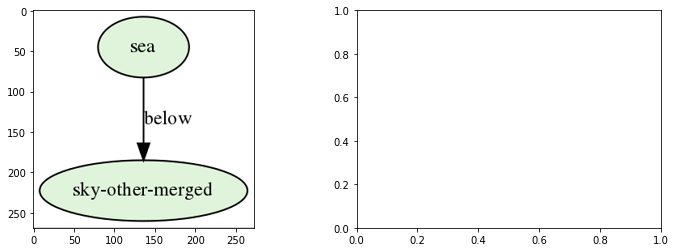

In [12]:
from config import graph_mining_dir

with open(os.path.join(graph_mining_dir, 'train_freqGraph_kbfilter_prune_gspan_01.json')) as f:
    freq_graphs = json.load(f)

fig, ax = plt.subplots(1,2,figsize=[12,4])
show_graphviz_graph(json_to_graphviz(freq_graphs[30]['g']), ax[0])